# Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('E:\Aa NIT\data cleaning\\claimants sample.csv')
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


### detection of outliers

In [3]:
Q1=df['LOSS'].quantile(0.25)
Q1

0.33

In [4]:
Q3=df['LOSS'].quantile(0.75)
Q3

3.538

In [5]:
IQR=Q3-Q1
IQR

3.2079999999999997

In [6]:
# now calculate manually
l_limit=Q1-(1.5*IQR)
u_limit=Q3+(1.5*IQR)
print(l_limit,u_limit)


-4.481999999999999 8.35


**outlier detection by boxplot**

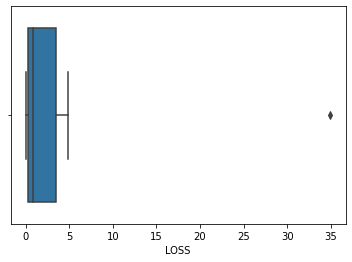

In [7]:
sns.boxplot(x=df['LOSS'])  # here is one outlier
plt.show()

**using Z score** _________manually

In [8]:
x=df['LOSS']
mu=df["LOSS"].mean()
sig=df['LOSS'].std()

In [9]:
df['loss_zscore']=(x-mu)/sig
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY,loss_zscore
0,5,0,1.0,0,50.0,34.940,0,2.637134
1,3,1,0.0,0,18.0,0.891,1,-0.374778
2,66,0,1.0,0,5.0,0.330,1,-0.424403
3,70,1,1.0,1,31.0,0.037,0,-0.450321
4,96,0,1.0,0,30.0,NaN,1,NaN
5,97,1,1.0,0,35.0,0.309,0,-0.426260
6,10,0,NaN,0,9.0,3.538,0,-0.140629
7,36,1,NaN,0,34.0,4.881,0,-0.021830
8,51,1,1.0,0,60.0,0.874,1,-0.376281
9,55,1,1.0,0,NaN,0.350,1,-0.422633


### calculate which outlier (means value of outlier)

In [10]:
df['loss_zscore']>+2

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: loss_zscore, dtype: bool

In [11]:
df['loss_zscore']<-2

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: loss_zscore, dtype: bool

**exactly which outlier**

In [12]:
outlier=df[(df['loss_zscore']>+2)|(df['loss_zscore']<-2)]
outlier

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY,loss_zscore
0,5,0,1.0,0,50.0,34.94,0,2.637134


In [13]:
df.drop("loss_zscore",axis=1,inplace=True)

In [14]:
df['LOSS'].fillna(df["LOSS"].median(),inplace=True)
df['LOSS']

0    34.940
1     0.891
2     0.330
3     0.037
4     0.874
5     0.309
6     3.538
7     4.881
8     0.874
9     0.350
Name: LOSS, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


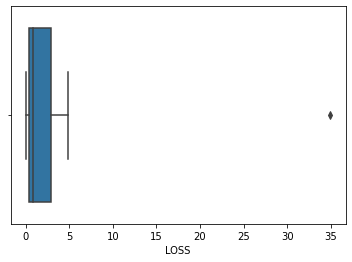

In [15]:
sns.boxplot(df['LOSS'])
plt.show()

# here is still outlier and we remove null value using median

## Dealing the Outlier(3 R Technique)

###  remove  (trimming :remove outlier form dataset)

In [16]:
### in between range( & is both true)
df_trimmed=df[(df['LOSS']>l_limit) & (df['LOSS']<u_limit)]
df_trimmed

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,0.874,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


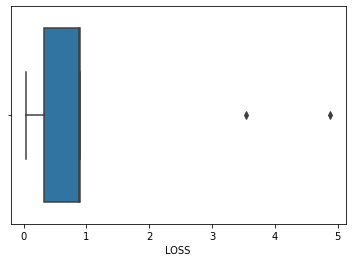

In [17]:
sns.boxplot(x=df_trimmed['LOSS'])  # again outlier comes hence we can not use this
plt.show()

## Replace the outliers

**repalce or rectify --> (data entry error,.....)**
- **simply replace with lower_limit and upper_limit(based on IQR)**
- **with Winzorization technique**


In [18]:
#pip install feature_engine

In [19]:
from feature_engine.outliers import Winsorizer

In [21]:
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['LOSS'])

df_win=win.fit_transform(df[["LOSS"]]) # for null value it is not applicable so we replace with median
df_win

,LOSS
0,6.688125
1,0.891000
2,0.330000
3,0.037000
4,0.874000
5,0.309000
6,3.538000
7,4.881000
8,0.874000
9,0.350000


In [24]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'LOSS': -3.4768749999999997} {'LOSS': 6.688124999999999}


<AxesSubplot:xlabel='LOSS'>

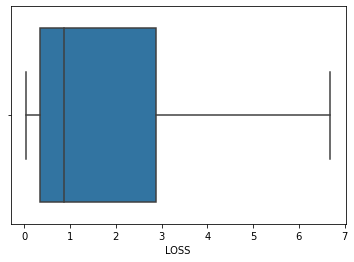

In [25]:
sns.boxplot(x=df_win["LOSS"])

### Replace Arbitary Outlier Capper (min and max values determined by user)

- we get the min and max values based on domain expertise

**Replace value with own value**

In [26]:
from feature_engine.outliers import ArbitraryOutlierCapper

In [27]:
capper=ArbitraryOutlierCapper(max_capping_dict={'LOSS':6},min_capping_dict={'LOSS':0.037})

df_c=capper.fit_transform(df[['LOSS']])

df_c

,LOSS
0,6.000
1,0.891
2,0.330
3,0.037
4,0.874
5,0.309
6,3.538
7,4.881
8,0.874
9,0.350


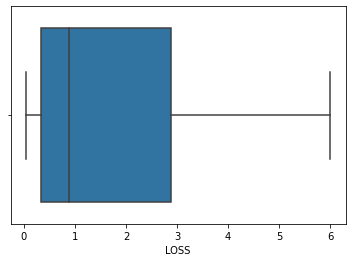

In [30]:
sns.boxplot(x=df_c['LOSS'])
plt.show()

In [31]:
# now completely remove outliers

## new data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E:\\All Datasets\\hearing_test.csv')
df.head(2)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

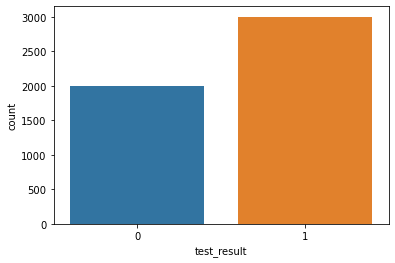

In [6]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result'>

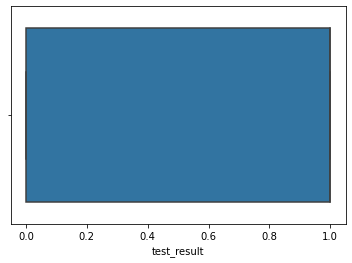

In [7]:
sns.boxplot(data=df,x='test_result')

<AxesSubplot:xlabel='age'>

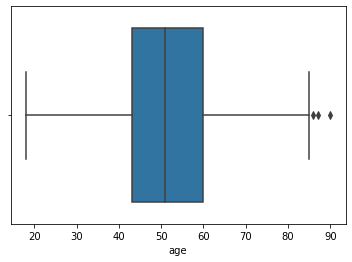

In [9]:
sns.boxplot(data=df,x='age')

<AxesSubplot:xlabel='physical_score'>

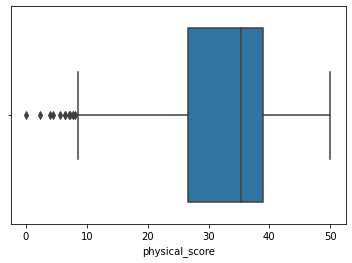

In [10]:
sns.boxplot(data=df,x='physical_score')

In [11]:
# we have outliers so now we remove it

In [12]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [15]:
# remove outliers from age and physical_score using winsorizer
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5)
df_new=win.fit_transform(df[['age','physical_score']])

In [17]:
df_new

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,8.4
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


<AxesSubplot:xlabel='age'>

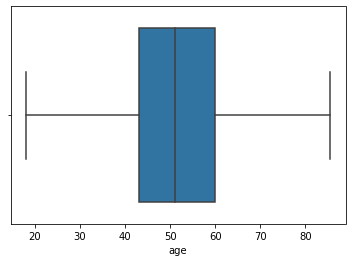

In [18]:
sns.boxplot(data=df_new,x='age') # here also we remove outliers

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

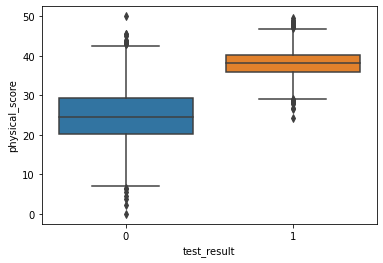

In [20]:
sns.boxplot(data=df,x='test_result',y='physical_score')